# Análisis exploratorio Ingresos por ocupación y género

## Instalación de librerías

In [1]:
#!pip install missingno

## Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
#from dataprep.eda import create_report, plot

## Recolección de datos

In [36]:
# Leer el dataset
df = pd.read_csv('inc_occ_gender.csv')
df

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na
...,...,...,...,...,...,...,...
553,Pumping station operators,18,Na,17,Na,1,Na
554,Refuse and recyclable material collectors,72,501,66,496,6,Na
555,Mine shuttle car operators,0,Na,0,Na,0,Na
556,"Tank car, truck, and ship loaders",6,Na,6,Na,0,Na


In [37]:
# Columnas
df.columns.to_list()

['Occupation',
 'All_workers',
 'All_weekly',
 'M_workers',
 'M_weekly',
 'F_workers',
 'F_weekly']

## Preguntas

### ¿?

## Clasificación de variables

In [38]:
#Información de las variables del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Occupation   558 non-null    object
 1   All_workers  558 non-null    int64 
 2   All_weekly   558 non-null    object
 3   M_workers    558 non-null    int64 
 4   M_weekly     558 non-null    object
 5   F_workers    558 non-null    int64 
 6   F_weekly     558 non-null    object
dtypes: int64(3), object(4)
memory usage: 30.6+ KB


In [39]:
# Numéricas
df[ [x for x in df.columns if df[x].dtype == 'int64' ] ].head()

,All_workers,M_workers,F_workers
0,109080,60746,48334
1,12480,7332,5147
2,1046,763,283
3,823,621,202
4,8,5,4


In [40]:
# Object
df_object = df[ [x for x in df.columns if df[x].dtype == 'object'] ]
df_object.head()

,Occupation,All_weekly,M_weekly,F_weekly
0,ALL OCCUPATIONS,809,895,726
1,MANAGEMENT,1351,1486,1139
2,Chief executives,2041,2251,1836
3,General and operations managers,1260,1347,1002
4,Legislators,Na,Na,Na


## Variables Categóricas

In [41]:
def explorar_tipo_objeto(df, feature):
  # checa cuantos datos categóricos (object) hay de alguna feature y devuleve los valores categóricos
    df_feature = pd.DataFrame(df[feature].value_counts())
    df_feature['porc (%)'] = df[feature].value_counts(normalize=True)*100
    print(df_feature)

In [42]:
# Revisión de cada colummna con la función explorar_tipo_objecto
for feature in df_object.columns:
    print('\n"' + str(feature) + '" Valores:')
    explorar_tipo_objeto(df, str(feature))
    print('\n---------------------------------------------------------------------------------------------------------------\n')


"Occupation" Valores:
                                                    Occupation  porc (%)
ALL OCCUPATIONS                                              1  0.179211
Insulation workers                                           1  0.179211
Paving, surfacing, and tamping equipment operators           1  0.179211
Pile-driver operators                                        1  0.179211
Operating engineers and other construction equi...           1  0.179211
...                                                        ...       ...
Audiologists                                                 1  0.179211
Podiatrists                                                  1  0.179211
Physician assistants                                         1  0.179211
Physicians and surgeons                                      1  0.179211
Material moving workers, all other                           1  0.179211

[558 rows x 2 columns]

----------------------------------------------------------------------------

In [43]:
#reemplazar los valores string 'Na' por tipo NaN
df[df_object.columns] = df[df_object.columns].replace({"Na":np.NaN})

## Valores nulos

In [44]:
#Revisión de valores nulos
print(df.isna().sum())
print('\n------------------------------------------------------------------------------------------------------------------\n')
print(df.isnull().sum())

Occupation       0
All_workers      0
All_weekly     236
M_workers        0
M_weekly       326
F_workers        0
F_weekly       366
dtype: int64

------------------------------------------------------------------------------------------------------------------

Occupation       0
All_workers      0
All_weekly     236
M_workers        0
M_weekly       326
F_workers        0
F_weekly       366
dtype: int64


<AxesSubplot:>

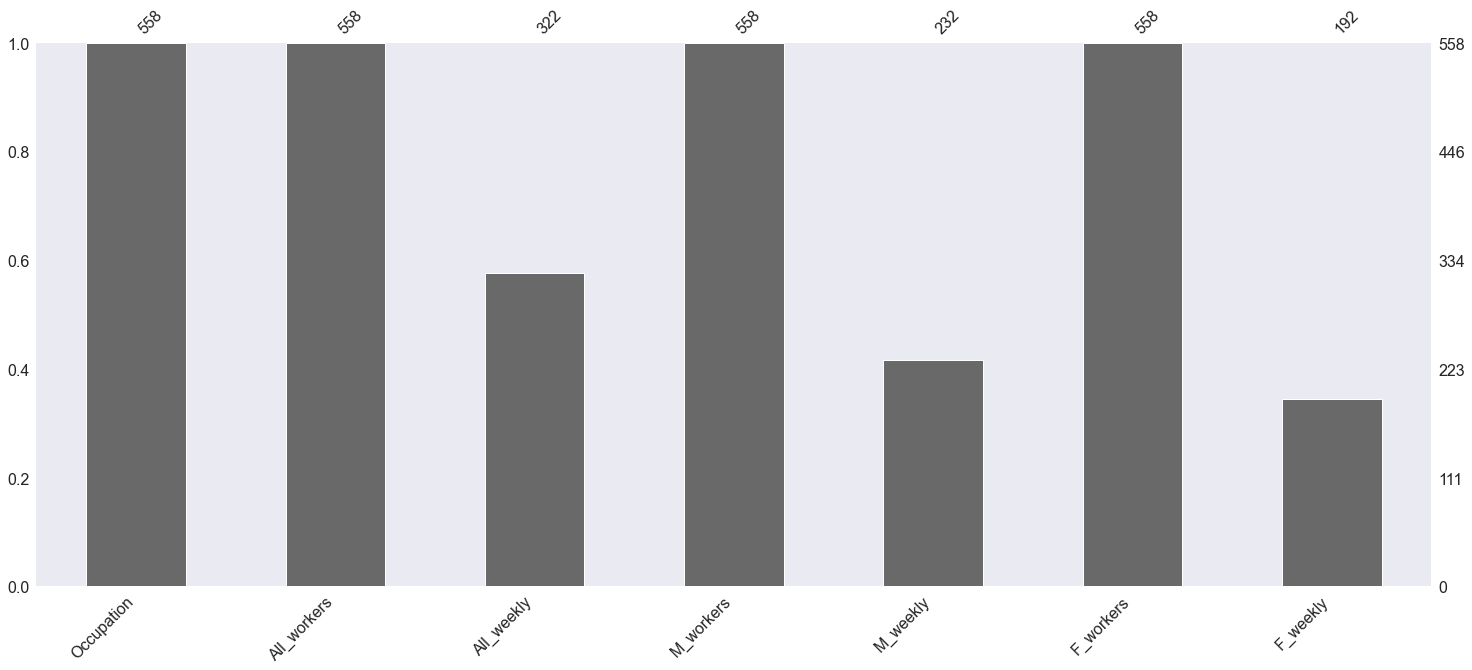

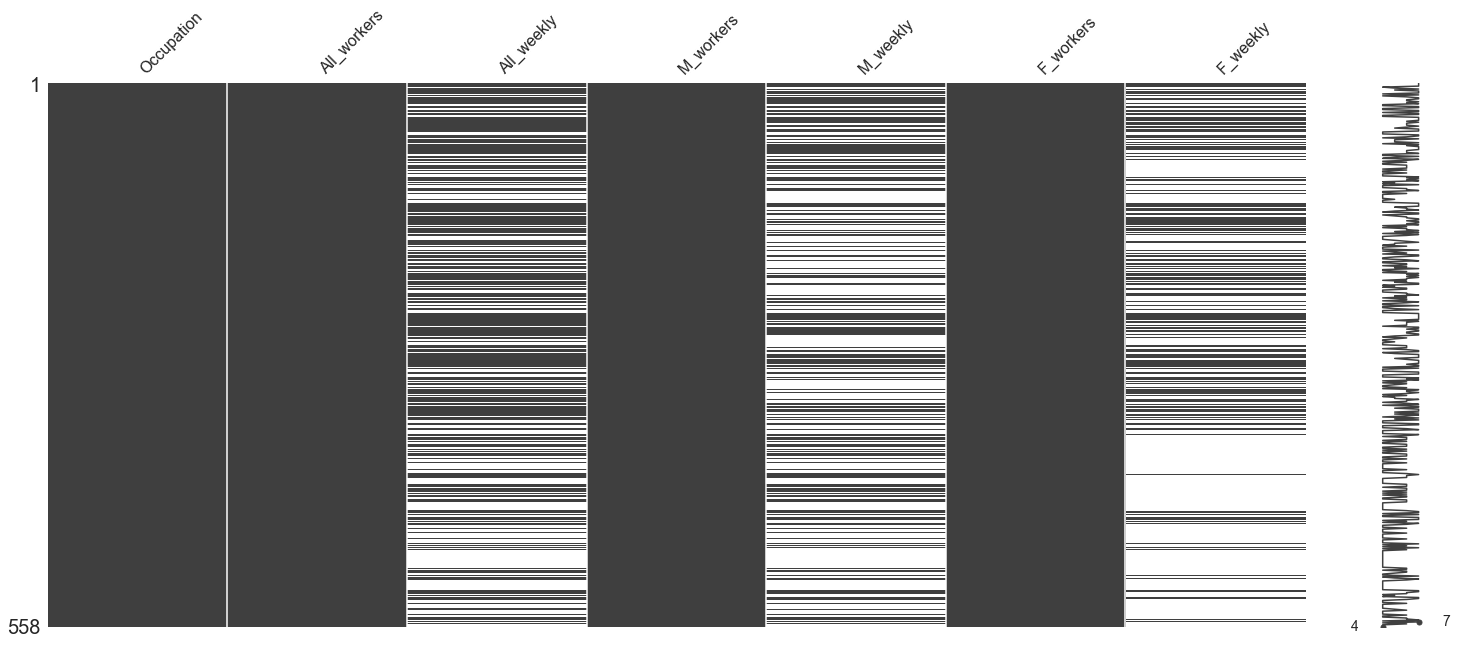

In [45]:
# gráfica de valores nulos
msno.bar(df)
msno.matrix(df)

### Reemplazo de valores nulos

In [46]:
# Reemplazar valores Nan por la media
for feature in df_object.columns:
    df[feature].fillna('0', inplace=True)    

print(df.isna().sum())
print('\n------------------------------------------------------------------------------------------------------------------\n')
print(df.isnull().sum())

Occupation     0
All_workers    0
All_weekly     0
M_workers      0
M_weekly       0
F_workers      0
F_weekly       0
dtype: int64

------------------------------------------------------------------------------------------------------------------

Occupation     0
All_workers    0
All_weekly     0
M_workers      0
M_weekly       0
F_workers      0
F_weekly       0
dtype: int64


In [53]:
#conversion de variables object a numéricas
df[['All_weekly','M_weekly','F_weekly']] = df[['All_weekly','M_weekly','F_weekly']].astype('int64')
df_numeric = df[ [x for x in df.columns if df[x].dtype == 'int64' ] ]
df_numeric.head()

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,109080,809,60746,895,48334,726
1,12480,1351,7332,1486,5147,1139
2,1046,2041,763,2251,283,1836
3,823,1260,621,1347,202,1002
4,8,0,5,0,4,0


## Revisión estadística

In [54]:
# Resumen estadístico de la información númerica del dataset
df.describe()

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,586.458781,525.155914,326.593190,416.888889,259.831541,277.137993
std,4758.979138,523.843902,2654.600532,557.179369,2142.551053,422.702964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,11.000000,0.000000,3.000000,0.000000
50%,67.000000,522.500000,33.500000,0.000000,18.000000,0.000000
75%,253.000000,914.000000,121.750000,843.500000,84.000000,570.500000
max,109080.000000,2041.000000,60746.000000,2251.000000,48334.000000,1836.000000


In [55]:
# Resumen estadístico de la información categórica del dataset
df.Occupation.describe()

count                 558
unique                558
top       ALL OCCUPATIONS
freq                    1
Name: Occupation, dtype: object

## Visualización de datos

### Histogramas

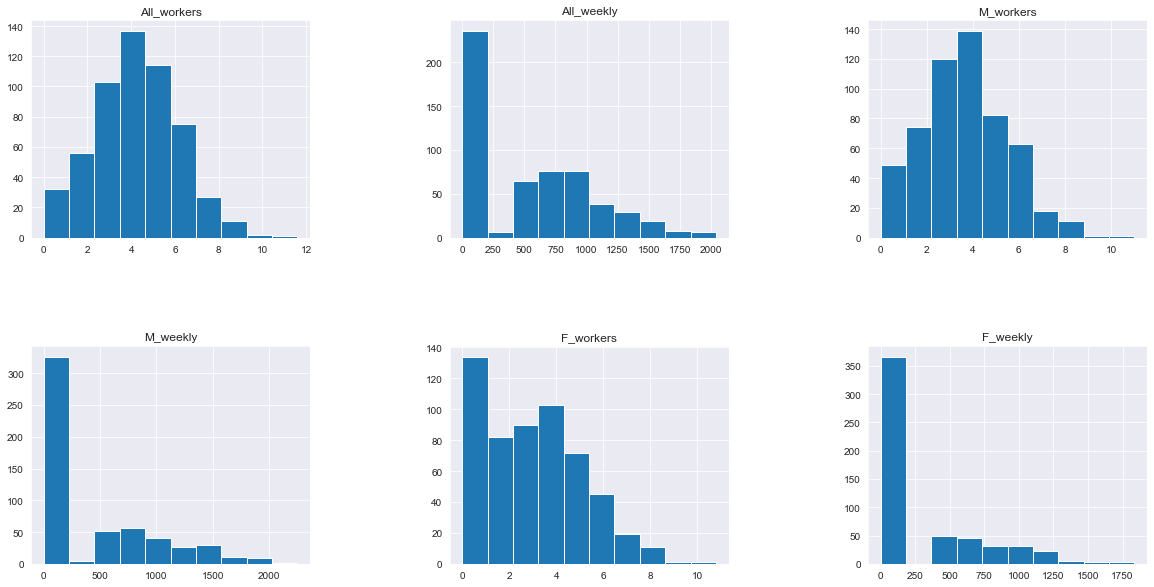

In [61]:
# Variables numéricas 
fig1 = plt.figure("Numéricas",figsize=(20, 10))
fig1.subplots_adjust(hspace=0.5, wspace=0.5)

col=3
for i in range(1, len(df_numeric.columns)+1):
    ax = fig1.add_subplot((len(df_numeric.columns)+1)//col, col, i)
    if i % 2 == 1:
        ax.hist(np.where(df_numeric.iloc[:,i-1] > 0, np.log(df_numeric.iloc[:,i-1]), 0))
    else:
        ax.hist(df_numeric.iloc[:,i-1])
    ax.grid()
    ax.set_title(df_numeric.columns[i-1])
    
plt.show()

### Dispersión

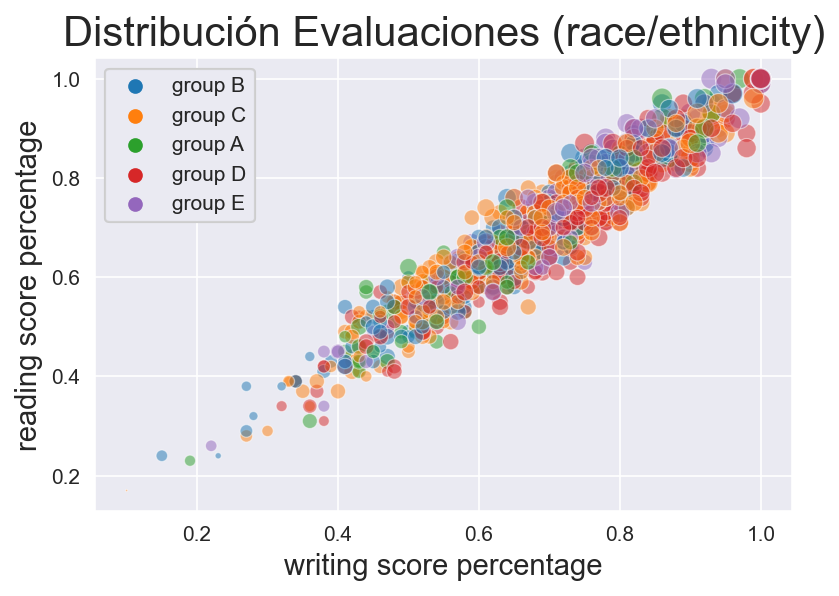

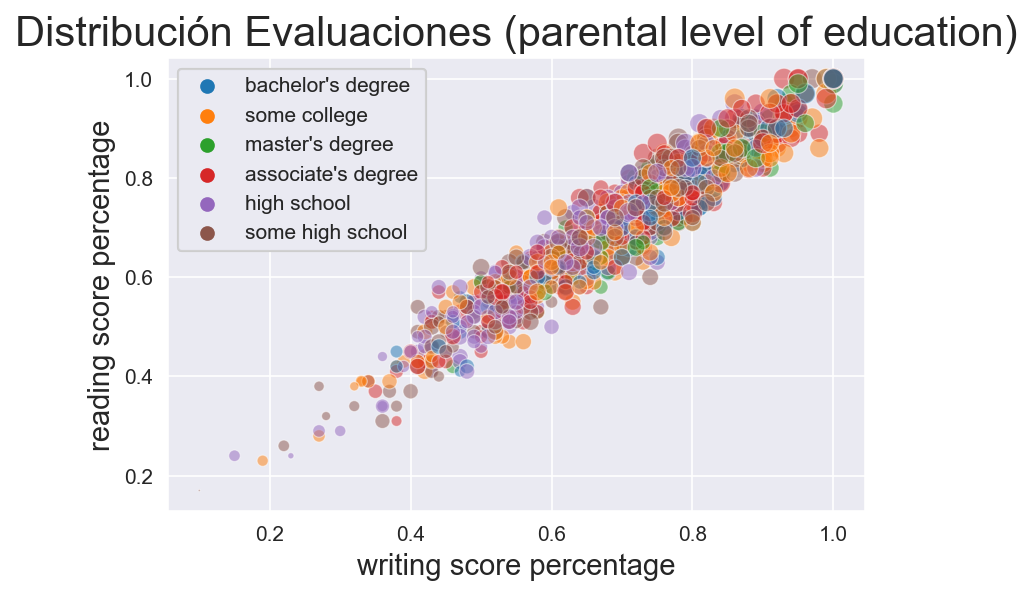

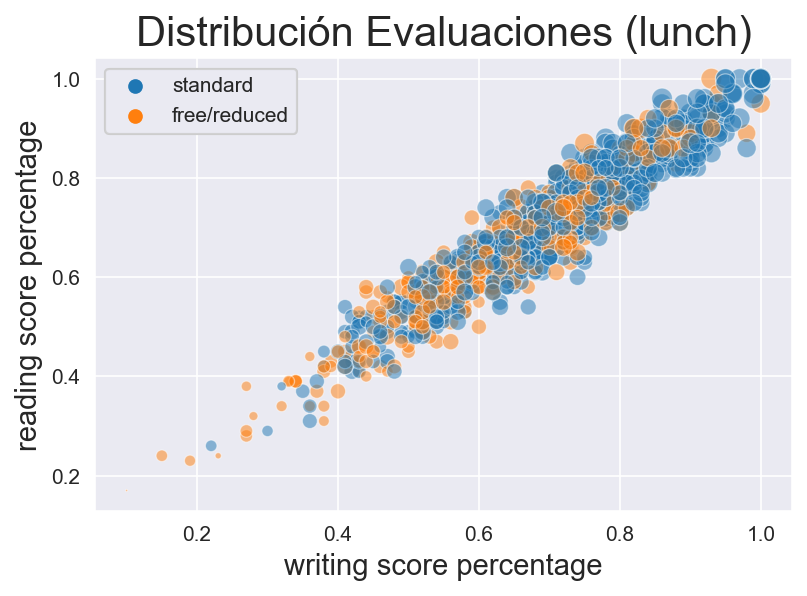

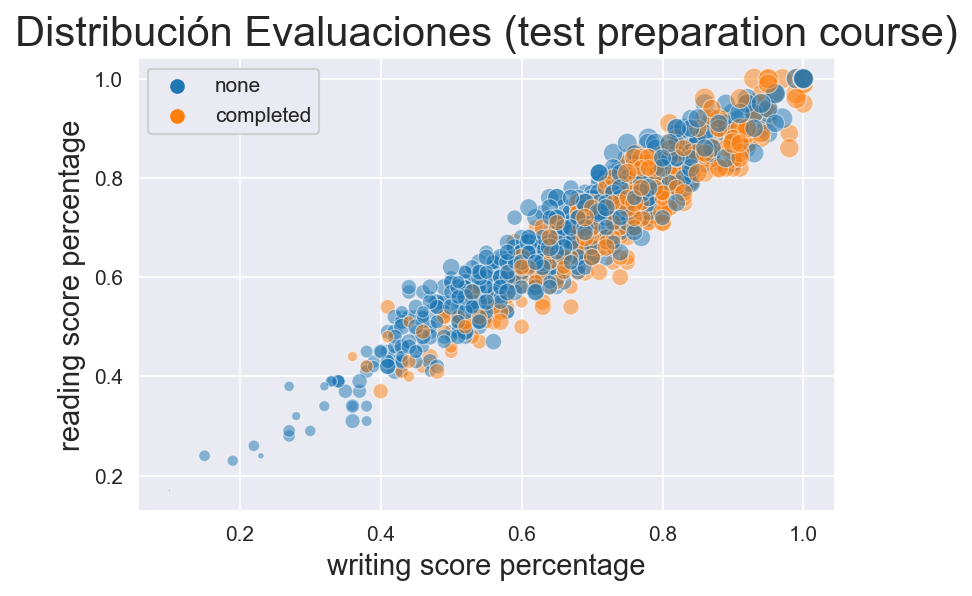

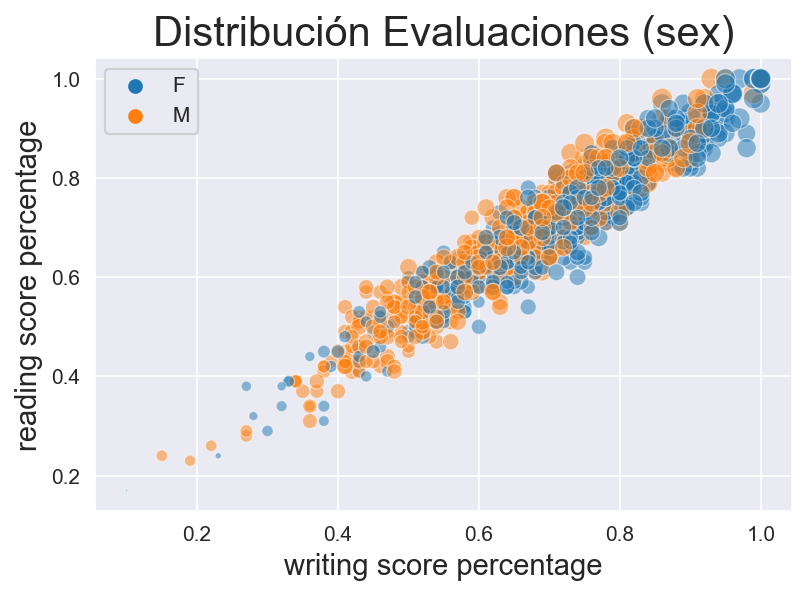

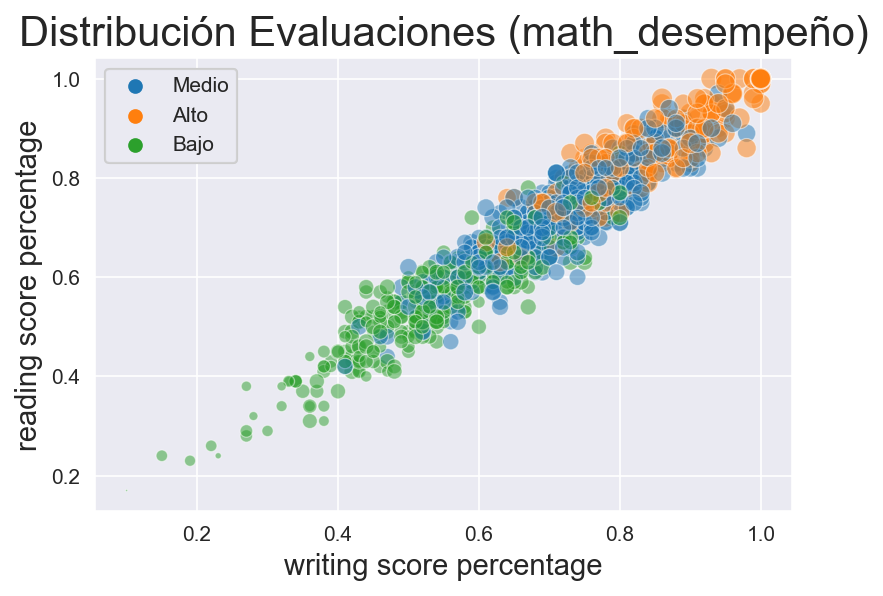

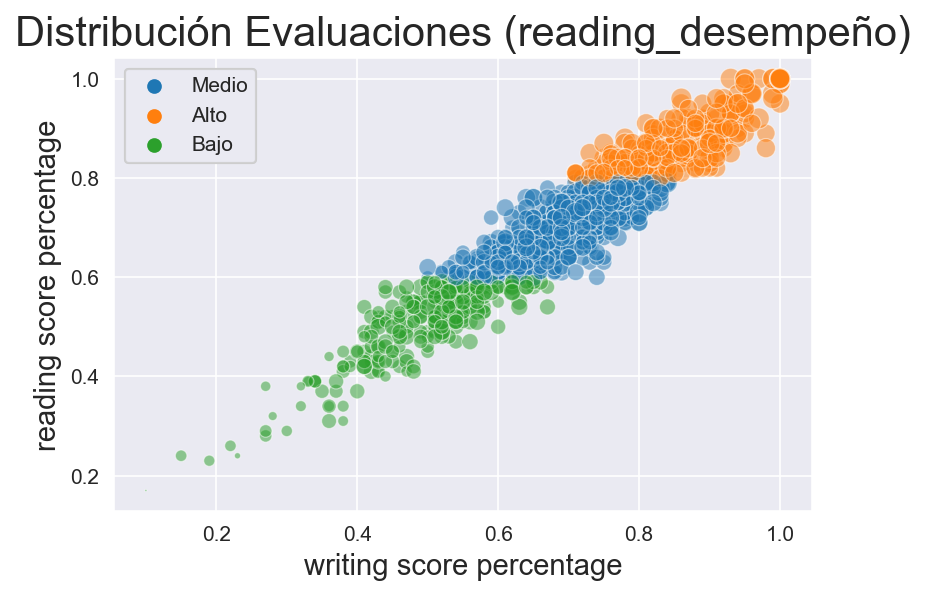

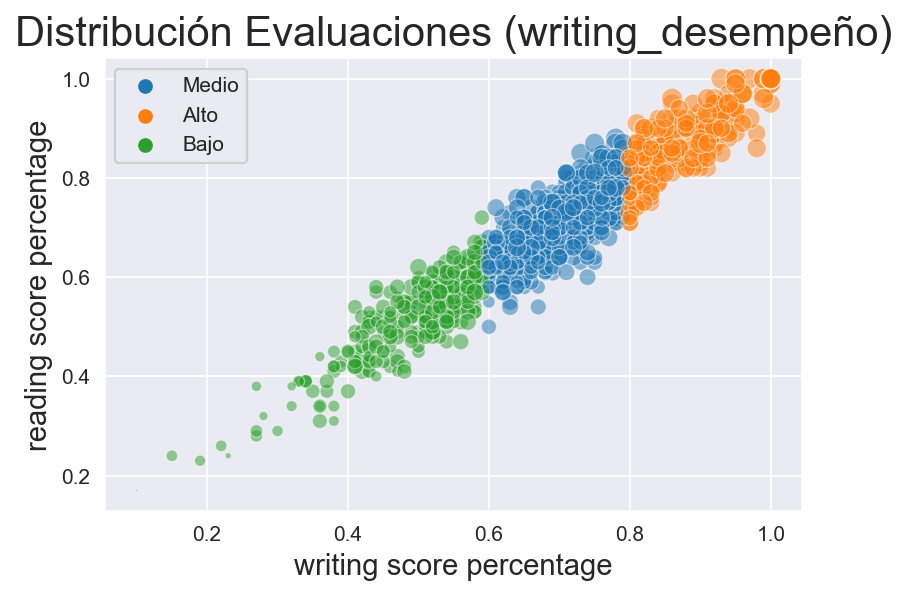

In [67]:
def read_vs_write(feature):

    plt.figure(dpi=150)
    np_math = np.array(df['math percentage'])
    np_math2 = np_math*2
    plot = sns.scatterplot(df['writing score percentage'], df['reading score percentage'], hue=df[feature], size=np_math2, sizes=(1,100), alpha=0.5)
    h, l = plot.get_legend_handles_labels()
    n = len(df[feature].unique())
    col_lgd = plt.legend(h[:n], l[:n])
    plt.gca().add_artist(col_lgd)
    plt.grid(True)
    
    plt.xlabel('writing score percentage', fontsize=14)
    plt.ylabel('reading score percentage', fontsize=14)
    plot_title = 'Distribución Evaluaciones ({})'.format(feature)
    plt.title(plot_title, fontsize=20)
    plt.show()
    

for feature in df_object.columns:   
    read_vs_write(feature)

### Dispersiones interesantes



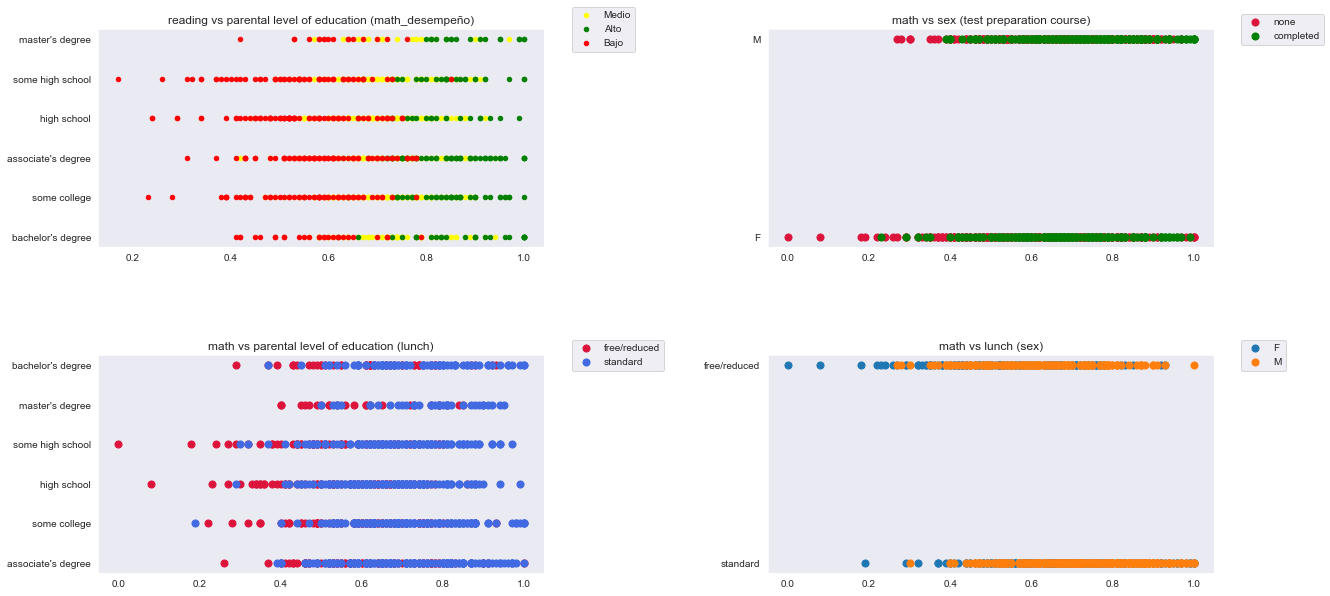

In [99]:
fig = plt.figure("Distribuciones",figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# reading vs parental level of education (math_desempeño)
ax = fig.add_subplot(2, 2, 1)
for elm in set(df['math_desempeño']):
    ax.scatter(df['reading score percentage'][df['math_desempeño']==elm],
               df['parental level of education'][df['math_desempeño']==elm],
               s = 20,
               c = {'Bajo':'Red','Medio':'Yellow','Alto':'Green'}[elm],
               label = elm)
ax.set_title("reading vs parental level of education (math_desempeño)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='center left')


# math vs sex (test preparation course)
ax = fig.add_subplot(2, 2, 2)
for elm in set(df['test preparation course']):
    ax.scatter(df['math percentage'][df['test preparation course']==elm],
               df['sex'][df['test preparation course']==elm],
               s = 50,
               c = {'none':'Crimson','completed':'Green'}[elm],
               label = elm)
ax.set_title("math vs sex (test preparation course)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='center left')


# math vs parental level of education (lunch)
ax = fig.add_subplot(2, 2, 3)
for elm in set(df['lunch']):
    ax.scatter(df['math percentage'][df['lunch']==elm],
               df['parental level of education'][df['lunch']==elm],
               s = 50,
               c = {'standard':'RoyalBlue','free/reduced':'Crimson'}[elm],
               label = elm)
ax.set_title("math vs parental level of education (lunch)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='center left')


# math vs lunch (sex)
ax = fig.add_subplot(2, 2, 4)
for elm in set(df['sex']):
    ax.scatter(df['math percentage'][df['sex']==elm],
               df['lunch'][df['sex']==elm],
               s = 50,
               label = elm)
ax.set_title("math vs lunch (sex)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='center left')


plt.show()

## Gráfico de pastel

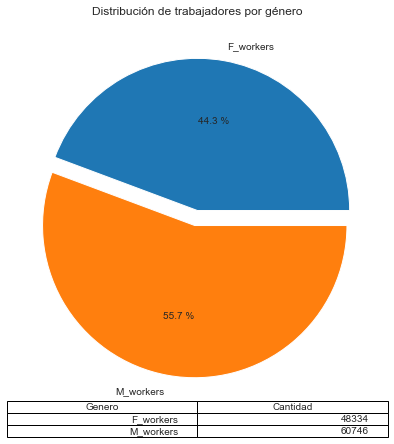

In [110]:
# Distribución de trabajadores por género
val = df[['F_workers','M_workers']].iloc[0,:]
#val = df.loc[0,['F_workers','M_workers']]
df_val = pd.DataFrame(val)
df_val.reset_index(inplace=True)
df_val.columns = ['Genero','Cantidad']
desfase = tuple([ 0.1 if elem==max(val) else 0 for elem in val ])
fig, ax = plt.subplots(figsize=(8, 7))
ax.pie(val, labels=val.index, autopct="%0.1f %%", explode=desfase)
ax.table(cellText=df_val.values,colLabels=df_val.columns,loc="bottom")
ax.set_title("Distribución de trabajadores por género")
plt.show()

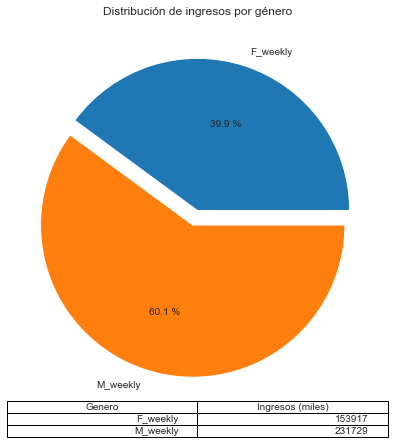

In [126]:
# Distribución de ingresos por género
val = df.loc[1:,['F_weekly','M_weekly']].sum()
df_val = pd.DataFrame(val)
df_val.reset_index(inplace=True)
df_val.columns = ['Genero','Ingresos (miles)']
desfase = tuple([ 0.1 if elem==max(val) else 0 for elem in val ])
fig, ax = plt.subplots(figsize=(8, 7))
ax.pie(val, labels=val.index, autopct="%0.1f %%", explode=desfase)
ax.table(cellText=df_val.values,colLabels=df_val.columns,loc="bottom")
ax.set_title("Distribución de ingresos por género")
plt.show()

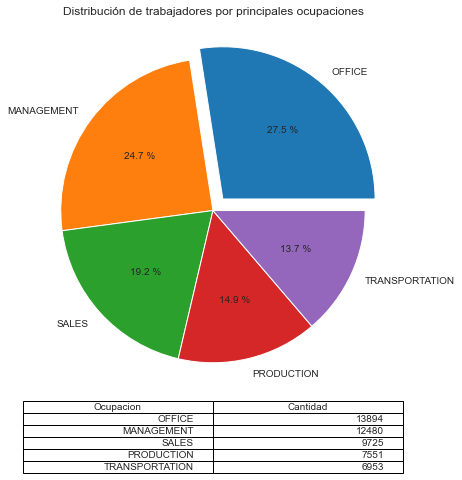

In [123]:
# Distribución de trabajadores por principales ocupaciones 
val = df[['Occupation','All_workers']].sort_values('All_workers', ascending=False).iloc[1:6,:]
val.columns = ['Ocupacion','Cantidad']
desfase = tuple([ 0.1 if elem==max(val['Cantidad'].values) else 0 for elem in val['Cantidad'].values ])
fig, ax = plt.subplots(figsize=(8, 7))
ax.pie(val['Cantidad'], labels=val['Ocupacion'], autopct="%0.1f %%", explode=desfase)
ax.table(cellText=val.values,colLabels=val.columns,loc="bottom")
ax.set_title("Distribución de trabajadores por principales ocupaciones")
plt.show()

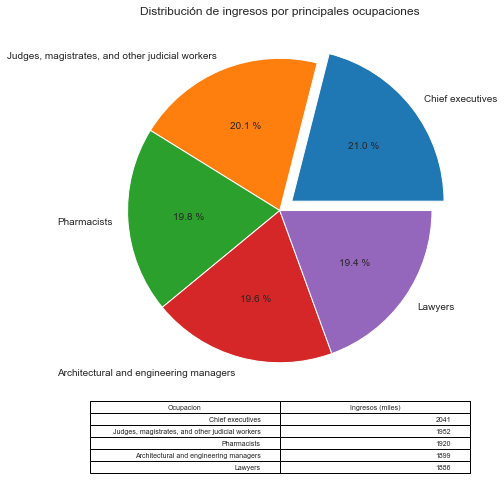

In [124]:
# Distribución de ingresos por principales ocupaciones 
val = df[['Occupation','All_weekly']].iloc[1:,:].sort_values('All_weekly', ascending=False).iloc[:5,:]
val.columns = ['Ocupacion','Ingresos (miles)']
desfase = tuple([ 0.1 if elem==max(val['Ingresos (miles)'].values) else 0 for elem in val['Ingresos (miles)'].values ])
fig, ax = plt.subplots(figsize=(8, 7))
ax.pie(val['Ingresos (miles)'], labels=val['Ocupacion'], autopct="%0.1f %%", explode=desfase)
ax.table(cellText=val.values,colLabels=val.columns,loc="bottom")
ax.set_title("Distribución de ingresos por principales ocupaciones")
plt.show()

In [ ]:
#Distribuciones por categoría
fig3,ax = plt.subplots(figsize=(20, 15))
col = 3
for i in range(1, len(df_object.columns)+1):
    feat = df_object.iloc[:,i-1]
    #dicc = { elem : 0 for elem in feat.value_counts() if elem!=max(feat.value_counts()) }
    #desfase = tuple([ dicc.get(elem,0.1) for elem in feat.value_counts() ])
    desfase = tuple([ 0.1 if elem==max(feat.value_counts()) else 0 for elem in feat.value_counts() ])
    ax = fig3.add_subplot((len(df_object.columns)+1)//col, col, i)
    ax.pie(feat.value_counts(), labels=feat.unique(), autopct="%0.1f %%", explode=desfase)
    ax.set_title("Distribución por {}".format(df_object.columns[i-1]))
    
plt.show()

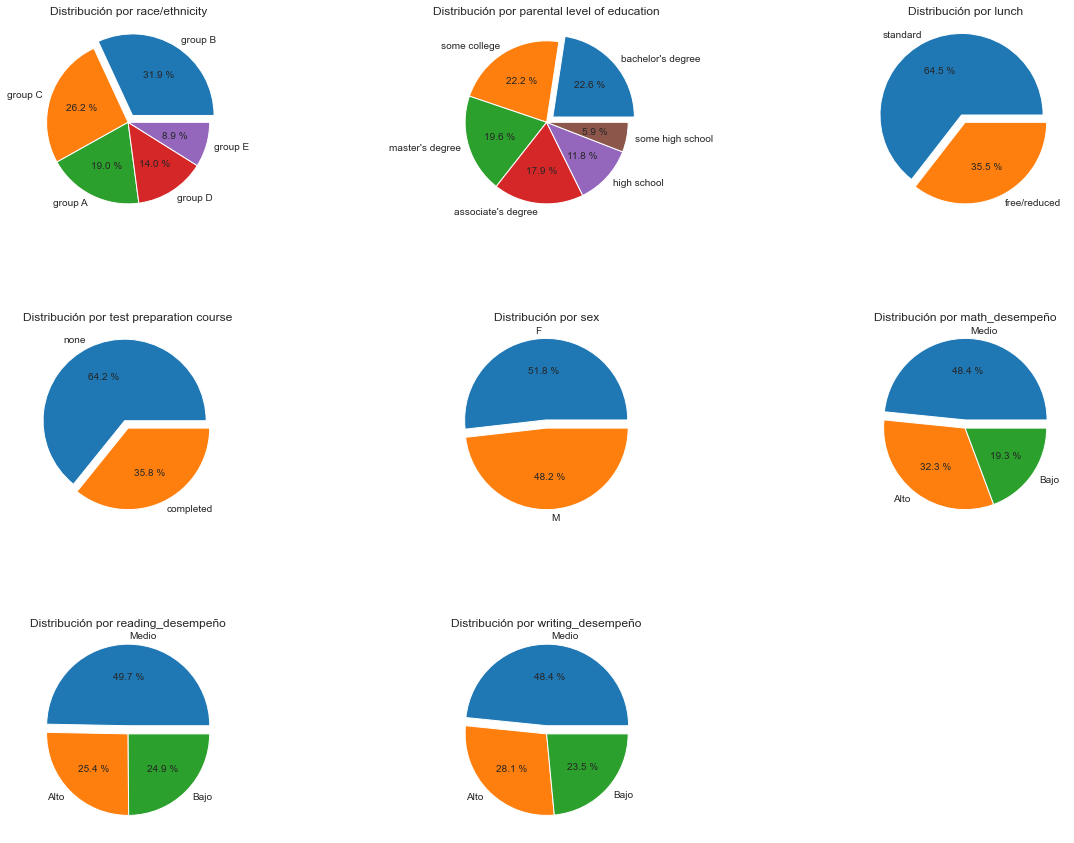

In [100]:
#Distribuciones por categoría
fig3 = plt.figure("Distribuciones por categoría",figsize=(20, 15))
fig3.subplots_adjust(hspace=0.5, wspace=0.5)

col = 3
for i in range(1, len(df_object.columns)+1):
    feat = df_object.iloc[:,i-1]
    #dicc = { elem : 0 for elem in feat.value_counts() if elem!=max(feat.value_counts()) }
    #desfase = tuple([ dicc.get(elem,0.1) for elem in feat.value_counts() ])
    desfase = tuple([ 0.1 if elem==max(feat.value_counts()) else 0 for elem in feat.value_counts() ])
    ax = fig3.add_subplot((len(df_object.columns)+1)//col, col, i)
    ax.pie(feat.value_counts(), labels=feat.unique(), autopct="%0.1f %%", explode=desfase)
    ax.set_title("Distribución por {}".format(df_object.columns[i-1]))
    
plt.show()

## Barras

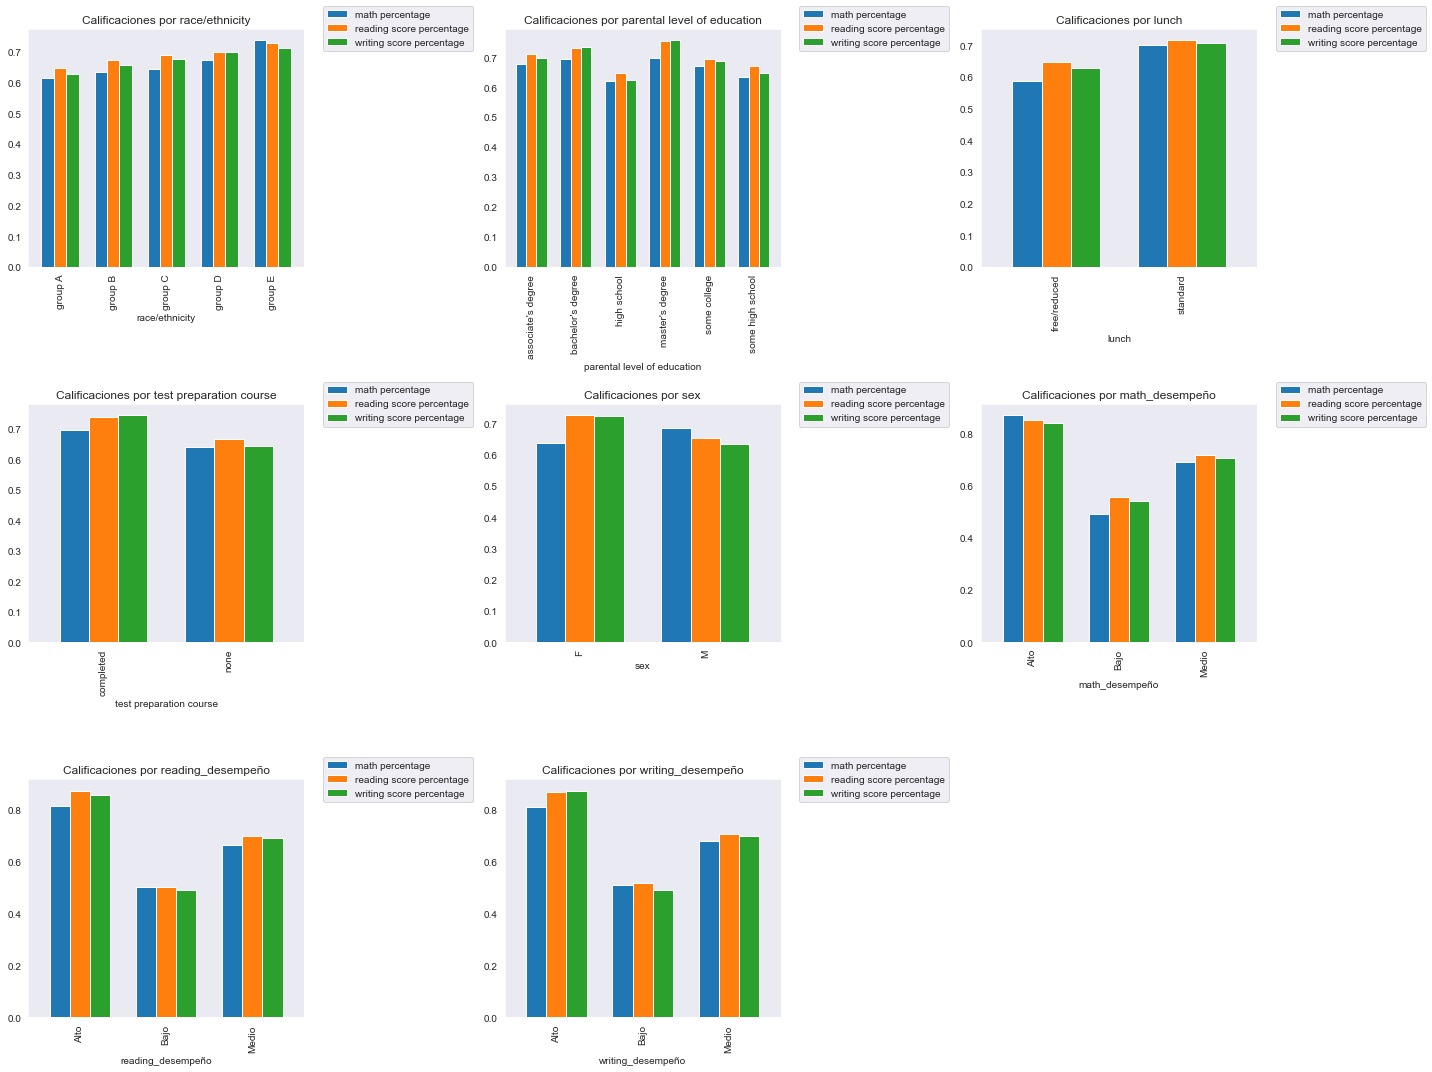

In [70]:
#calificaciones promedio por categoría
fig4 = plt.figure("Calificaciones por categoría",figsize=(20, 15))
fig4.subplots_adjust(hspace=0.5, wspace=0.5)

col = 3
for i in range(1, len(df_object.columns)+1):
    ax = fig4.add_subplot((len(df_object.columns)+1)//col, col, i)
    df.groupby([df_object.columns[i-1]]).mean().plot.bar(ax=ax,width = 0.7)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='center left')
    plt.tight_layout()
    ax.set_title("Calificaciones por {}".format(df_object.columns[i-1]))
    
plt.show()

### Histograma 2D

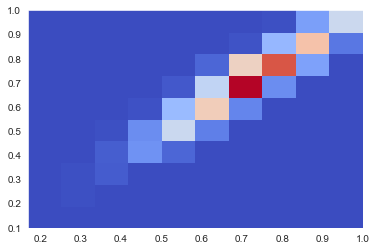

In [71]:
fig5, ax = plt.subplots()
ax.hist2d(df['reading score percentage'],df['writing score percentage'],cmap='coolwarm', weights=df['math percentage'])
plt.show()

### Matriz de correlación

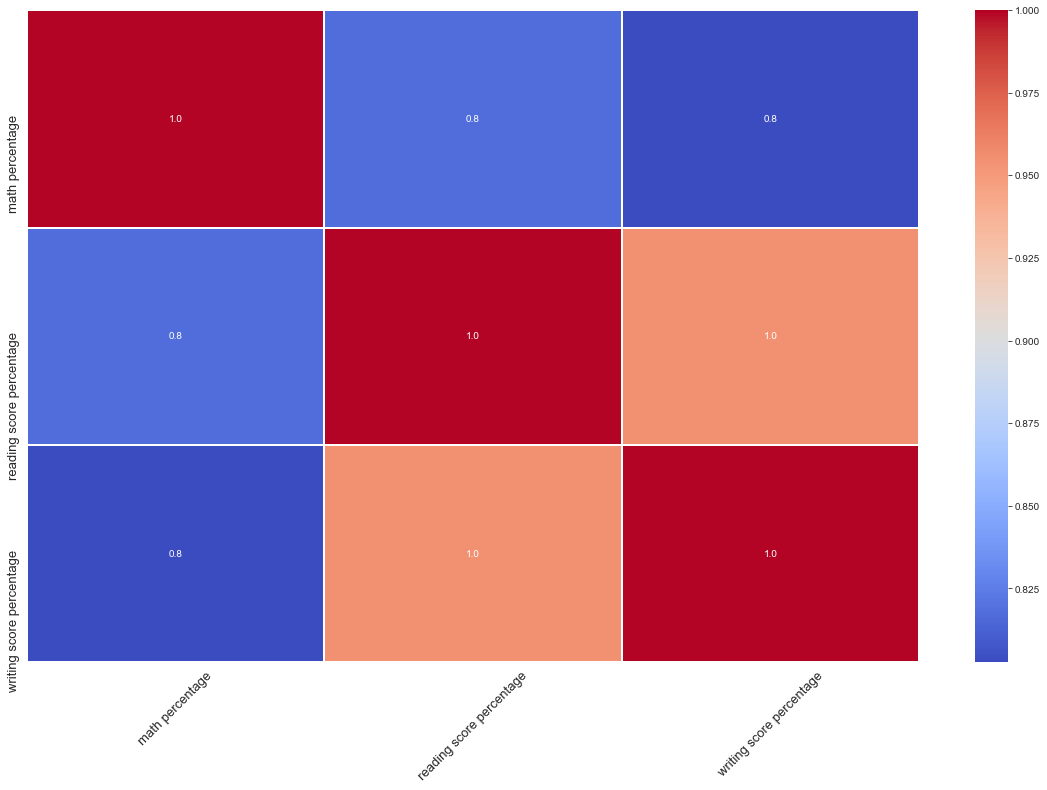

In [72]:
# matriz de correlaciones
corr3 = df3.corr(method='pearson') 

plt.figure(figsize=(20,12))
upp_mat = np.triu(corr3)
ax = sns.heatmap(corr3, cmap='GnBu', annot=True, mask = upp_mat, fmt='.1f', linewidths=1)
#coolwarm
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 13,rotation=90)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 13)
plt.show()

In [73]:
# Dataframe de matriz de correlaciones
corr.style.background_gradient(cmap='coolwarm')

,math percentage,reading score percentage,writing score percentage
math percentage,1.000000,0.817580,0.802642
reading score percentage,0.817580,1.000000,0.954598
writing score percentage,0.802642,0.954598,1.000000


# Procesamiento Machine Learning

## Hallazgos

## Conclusiones